# <u>Predicting Breast Cancer in a patient</u>

<u>Abstract:</u>
    
    Breast cancer represents one of the diseases that make a high number of deaths every year. It is the most common type of ll cancers and the main cause of women's deaths worldwide. Classification and data mining methods are an effective way to classify data. Especially in the medical field, where those methods are widely used in diagnosis and analysis to make decisions.

<u>Problem Statement:</u>
    
    Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the  ensembling Techniques. Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.


<u>Dataset Information:</u>
    
    The dataset consists of several predictor variables and one target variable, Diagnosis. The target variable has values Benign' and 'Malignant', where 'Benign' means that the cells are not harmful or there is no cancer and 'Malignant' means that the patient has cancer and the cells have a harmful effect
    
<u>Variable Description:</u>

<table>
<tbody>
<tr>
<td style="text-align: center;" width="154">
<p>Column</p>
</td>
<td style="text-align: center;" width="446">
<p>Description</p>
</td>
</tr>
<tr>
<td width="154">
<p>radius</p>
</td>
<td width="446">
<p>Mean of distances from center to points on the perimeter</p>
</td>
</tr>
<tr>
<td width="154">
<p>texture</p>
</td>
<td width="446">
<p>Standard deviation of gray-scale values</p>
</td>
</tr>
<tr>
<td width="154">
<p>perimeter</p>
</td>
<td width="446">
<p>Observed perimeter of the lump</p>
</td>
</tr>
<tr>
<td width="154">
<p>area</p>
</td>
<td width="446">
<p>Observed area of lump</p>
</td>
</tr>
<tr>
<td width="154">
<p>smoothness</p>
</td>
<td width="446">
<p>Local variation in radius lengths</p>
</td>
</tr>
<tr>
<td width="154">
<p>compactness</p>
</td>
<td width="446">
<p>perimeter^2 / area - 1.0</p>
</td>
</tr>
<tr>
<td width="154">
<p>concavity</p>
</td>
<td width="446">
<p>Severity of concave portions of the contour</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>
<table>
<tbody>
<tr>
<td width="154">
<p>concave points</p>
</td>
<td width="446">
<p>number of concave portions of the contour</p>
</td>
</tr>
<tr>
<td width="154">
<p>symmetry</p>
</td>
<td width="446">
<p>Lump symmetry</p>
</td>
</tr>
<tr>
<td width="154">
<p>fractal dimension</p>
</td>
<td width="446">
<p>"coastline approximation" - 1</p>
</td>
</tr>
<tr>
<td width="154">
<p>Diagnosis</p>
</td>
<td width="446">
<p>Whether the patient has cancer or not? ('Malignant','Benign')</p>
</td>
</tr>
</tbody>
</table>

    The mean, standard error and "worst" or largest (mean of the three largest values) of
    these features were computed for each image, resulting in 30 features. For instance, field
    3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

<u>Scope:</u>
    
    Analysing the available data and exploring relationships among given variables
    Data Pre-processing
    Training SVM classifier to predict whether the patient has cancer or not
    Assess the correctness in classifying data with respect to efficiency and effectiveness of the SVM classifier in terms of accuracy, precision, sensitivity, specificity and AUC ROC
    Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library


<u>Learning Outcome:</u>
    
    The students will get a better understanding of how the variables are linked to each other and build an SVM model. Apart from various performance measures, they will also learn about hyperparameter tuning with cross-validation to improve these scores.


Lets start by importing necessary libraries

In [1]:
# to load the dataset
import pandas as pd
# For EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Override pyplot settings by seaborn theme
sns.set()
# for necessary computation and evaluation
import numpy as np
# To display maximum columns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv(r'cancer.csv',header = 0, index_col = 0)

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 31)

No. of rows and columns in the data is 569 and 31 respectvely.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [6]:
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<u>Initial Observation</u>

    There is an id that cannot be used for classificaiton hence used it as index column
    Diagnosis is our target class 
    There are no missing values in the dataset
    I do not have any idea about other feature names actually I do not need because machine learning is awesome :)

#### EDA

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

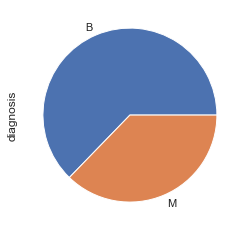

In [39]:
print(df.diagnosis.value_counts())
df.diagnosis.value_counts().plot.pie()

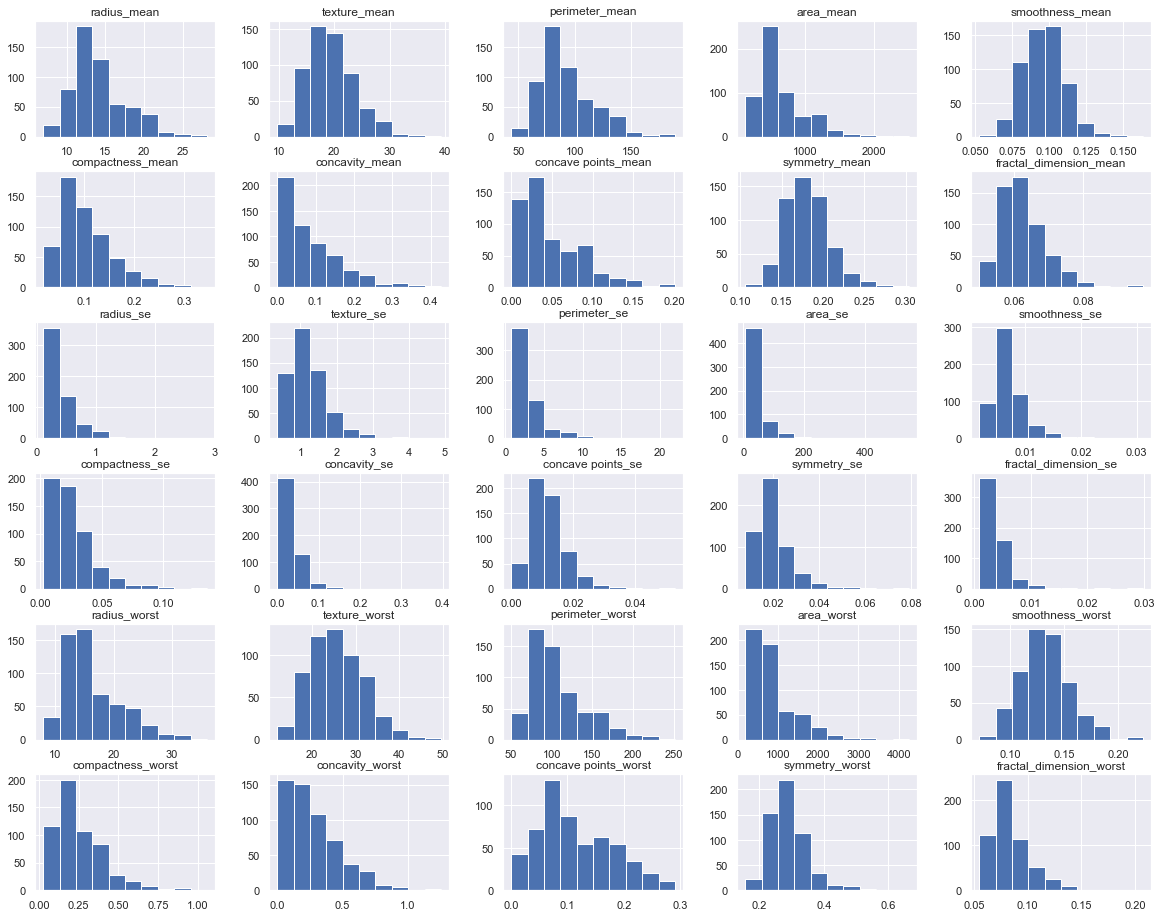

In [41]:
df.hist(figsize=(20,16))
plt.show()

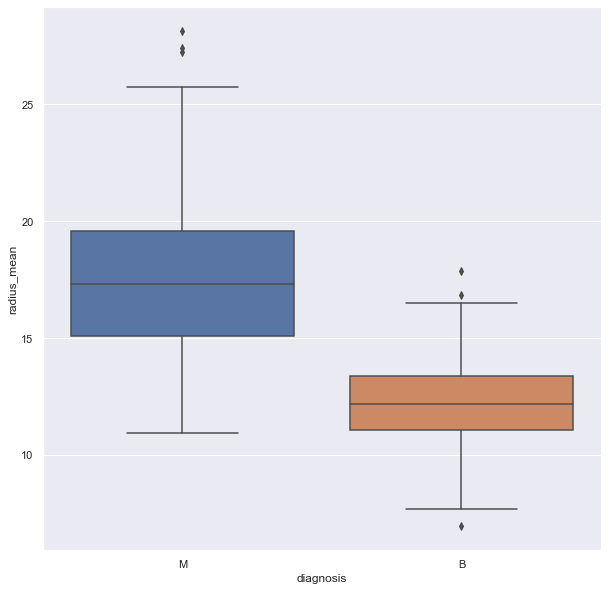

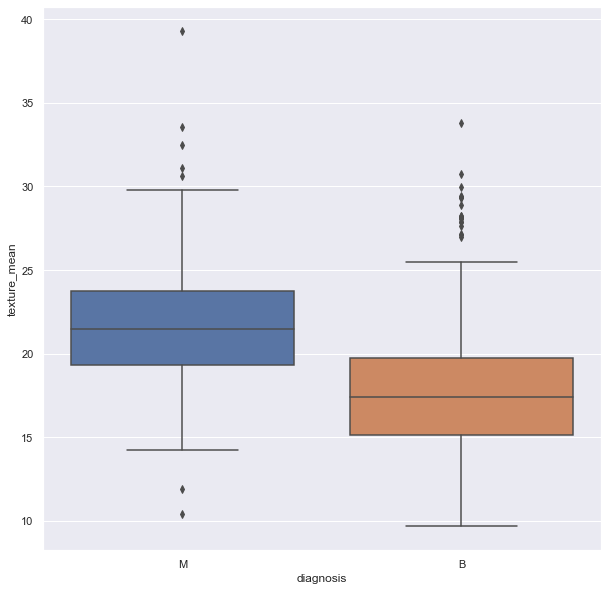

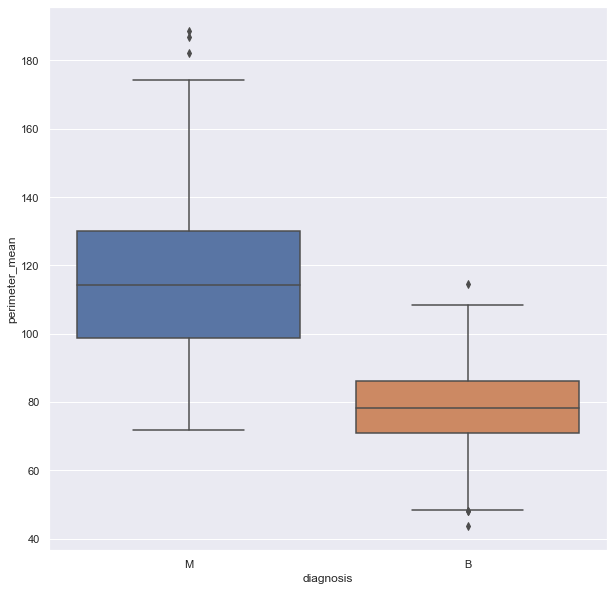

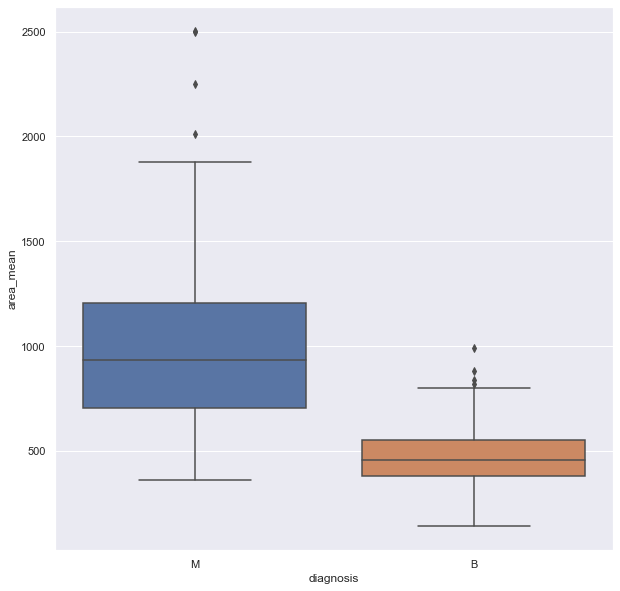

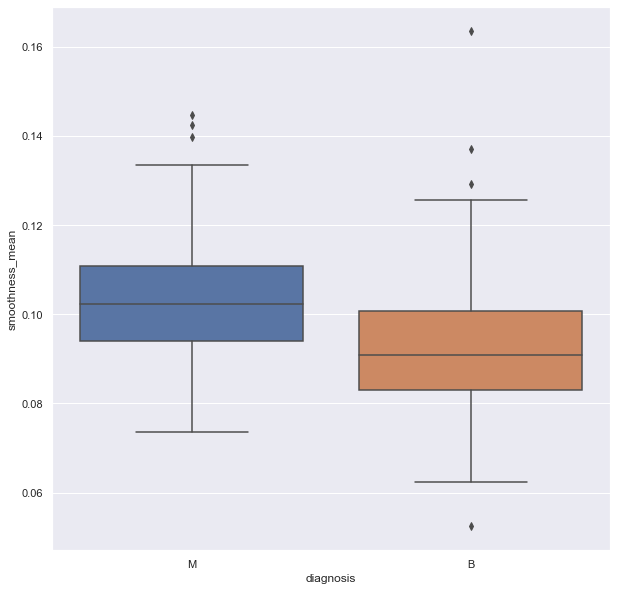

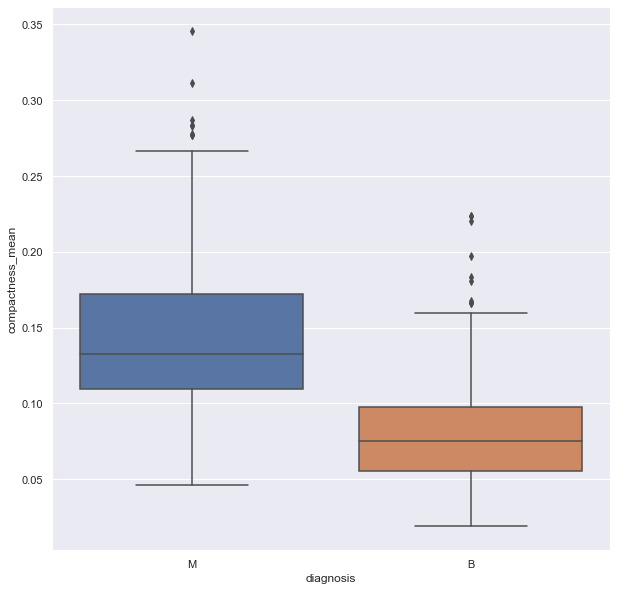

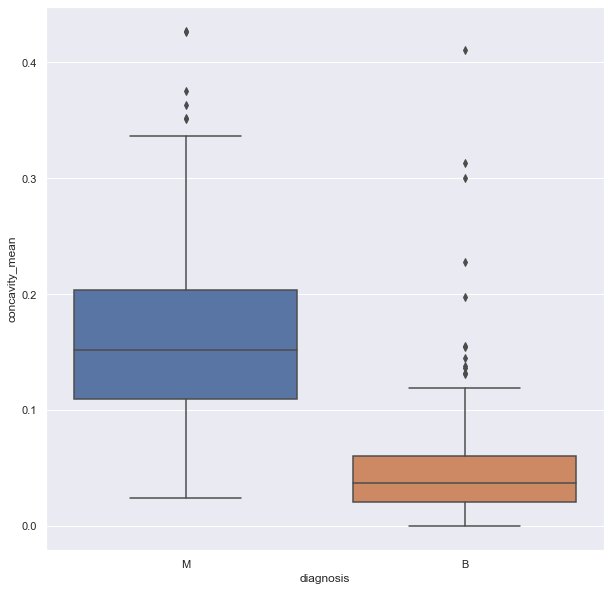

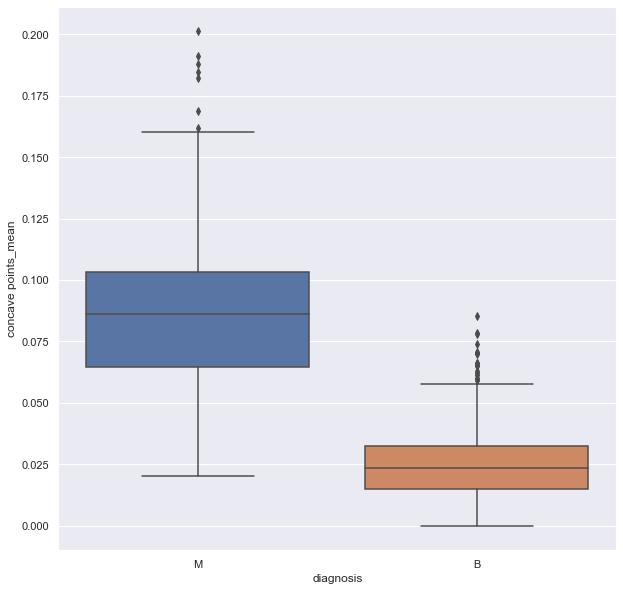

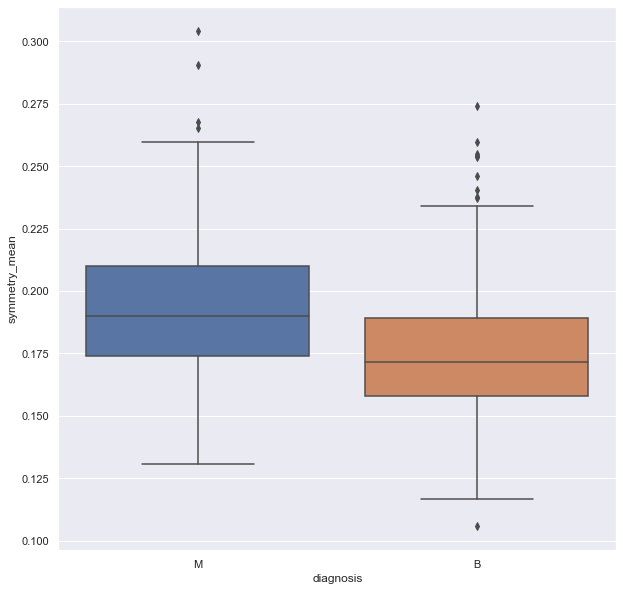

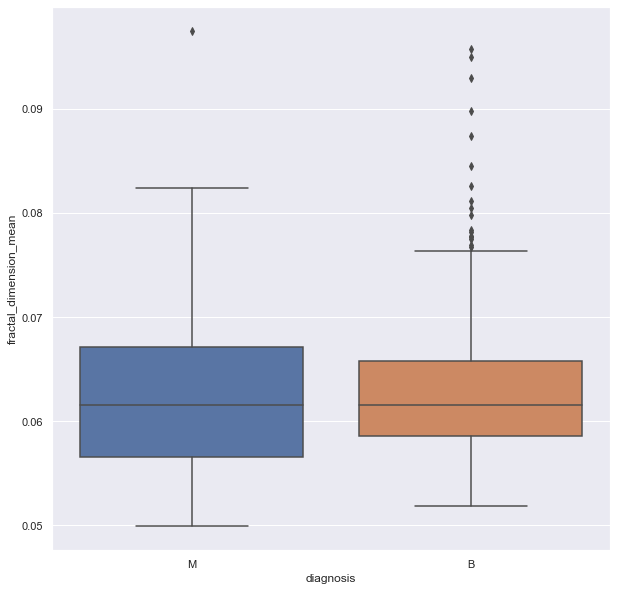

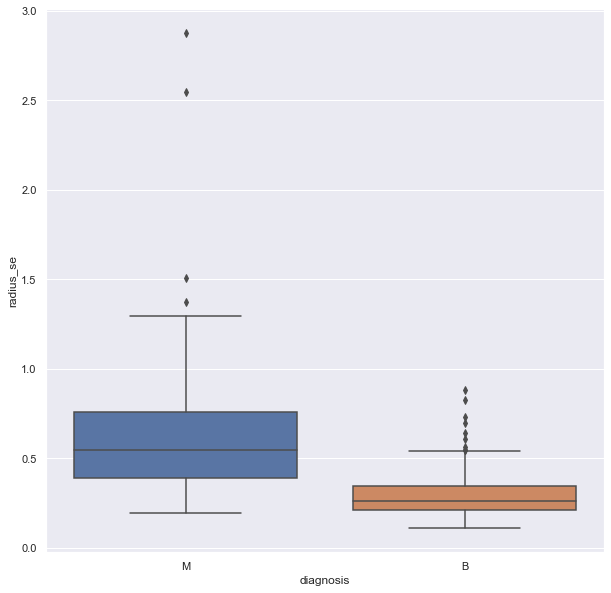

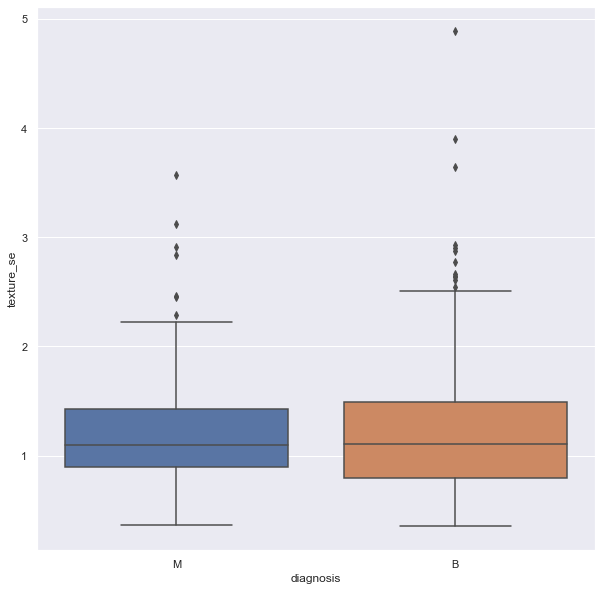

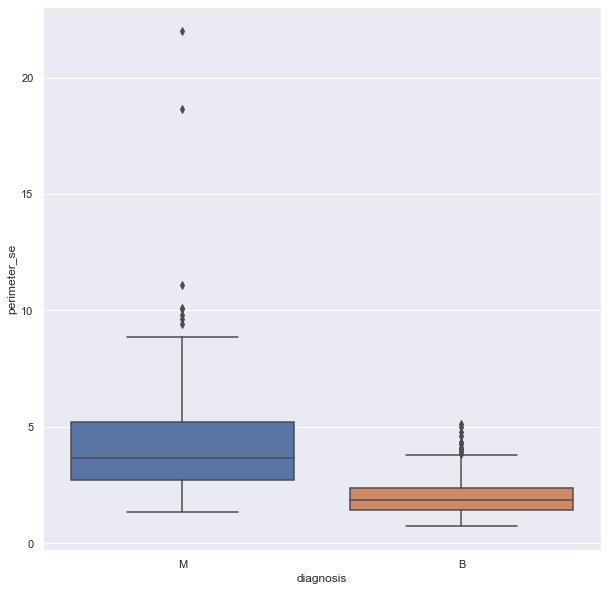

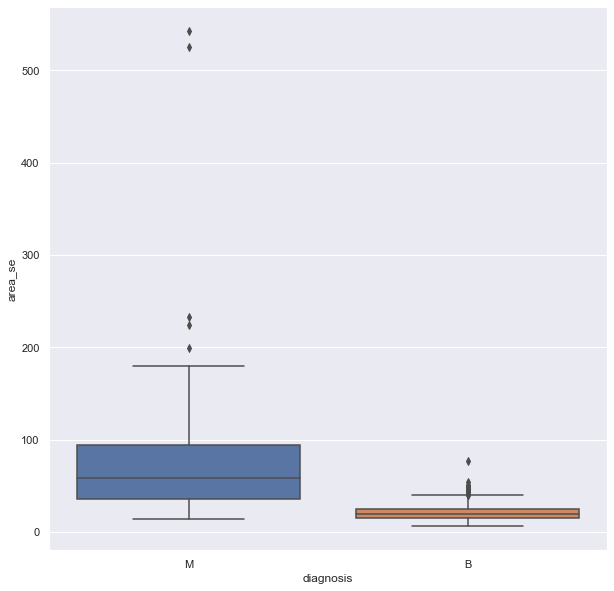

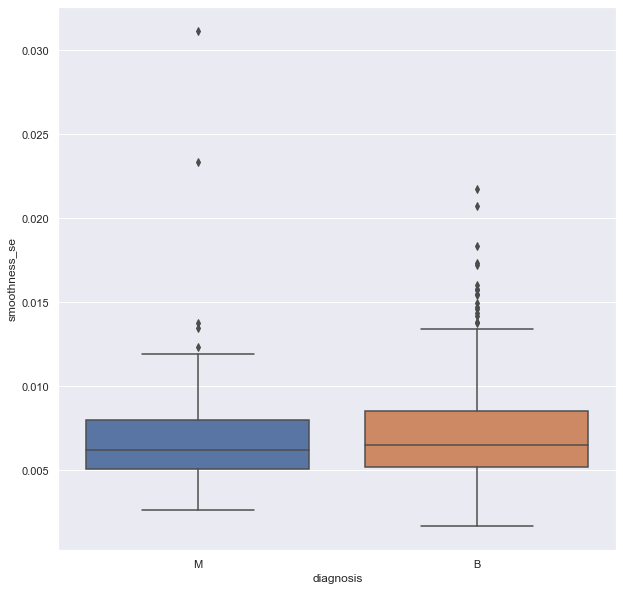

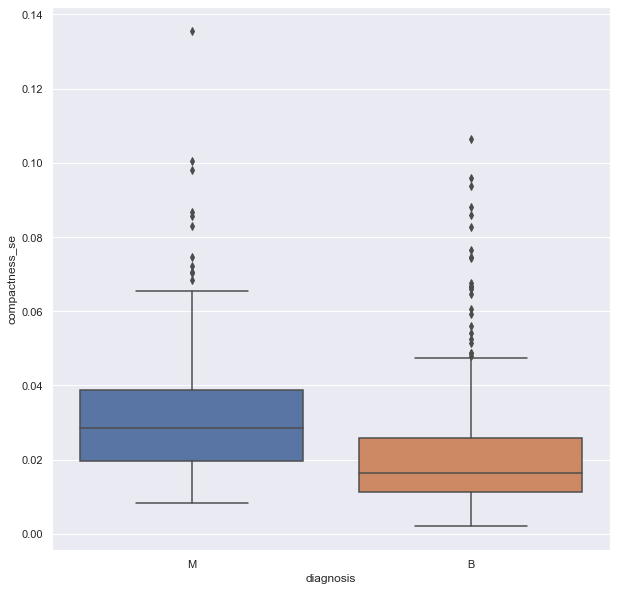

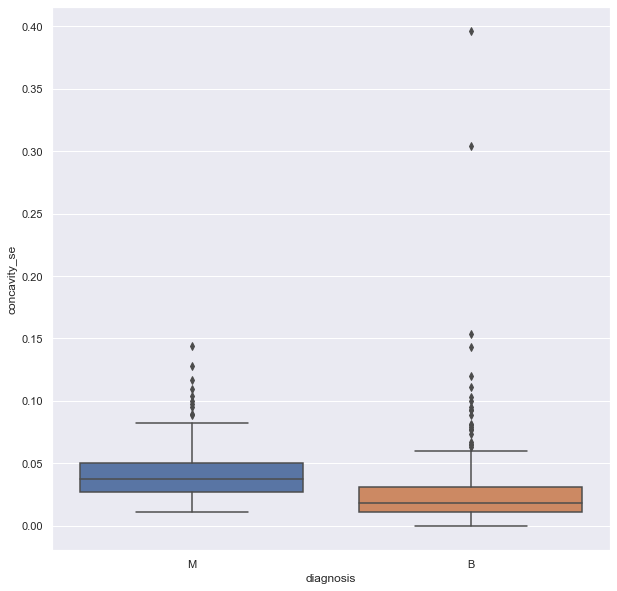

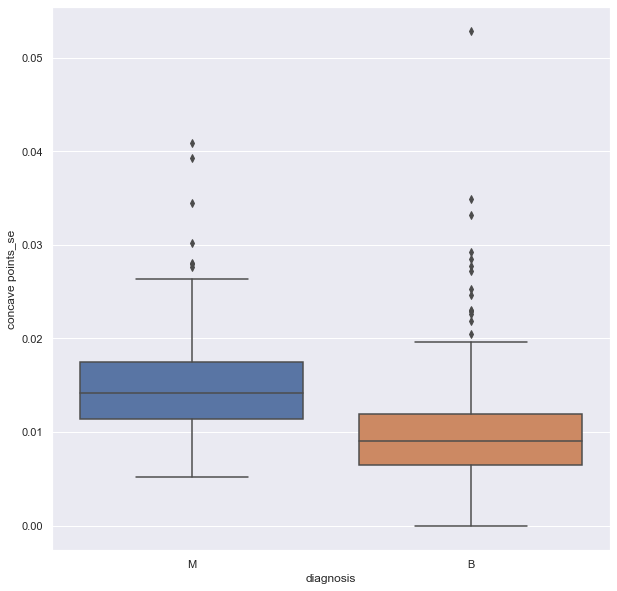

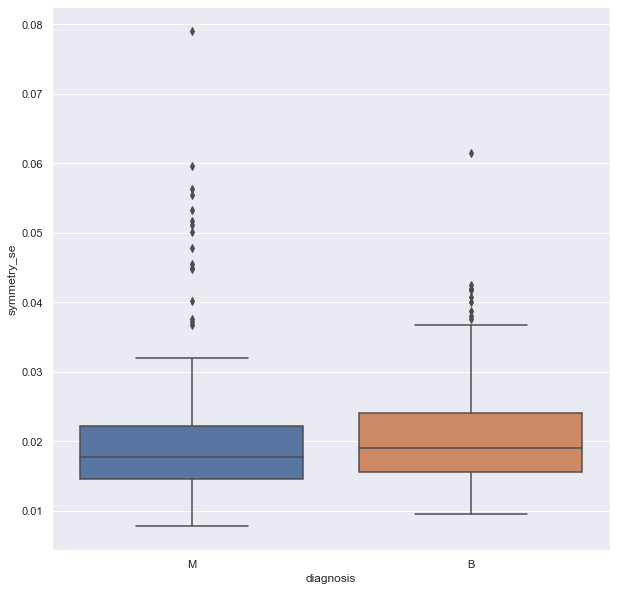

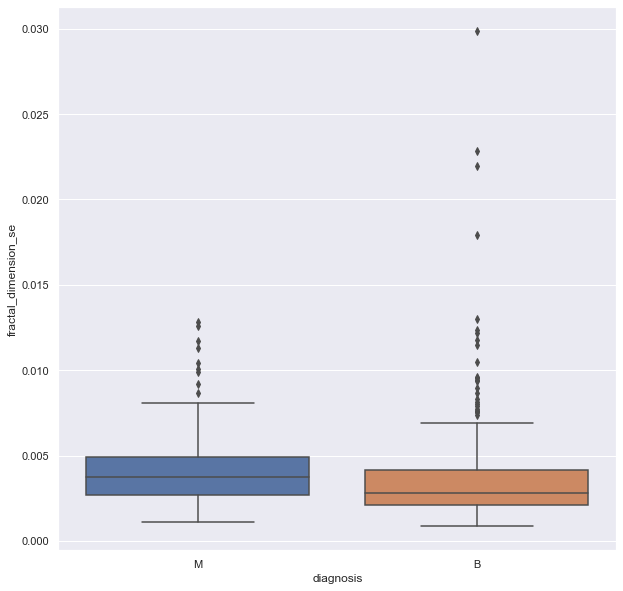

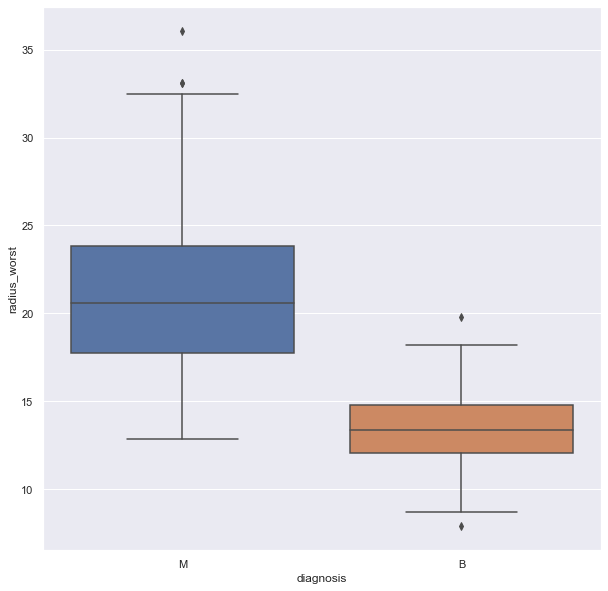

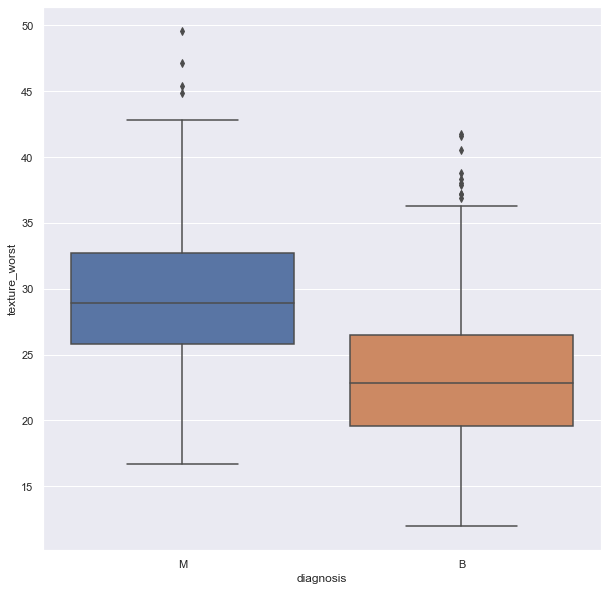

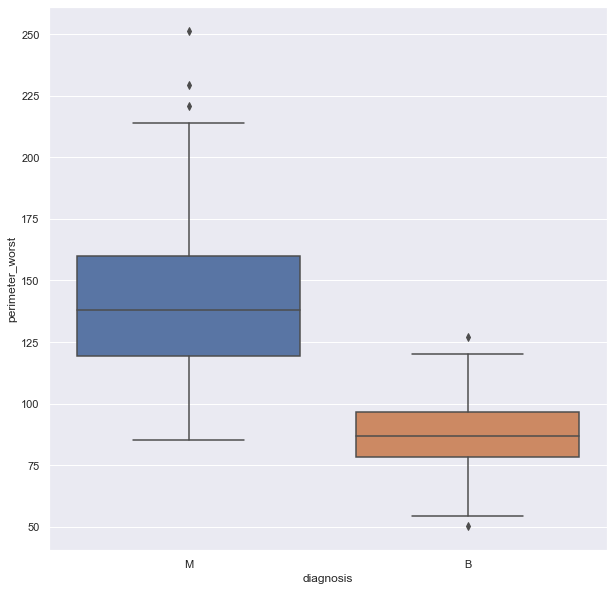

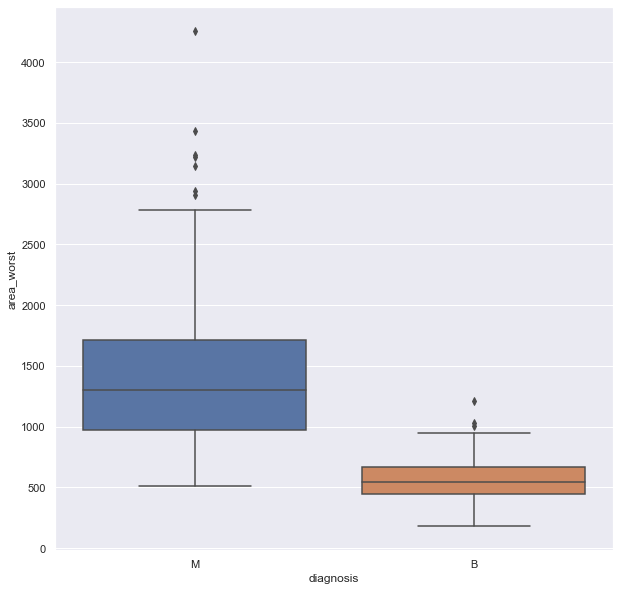

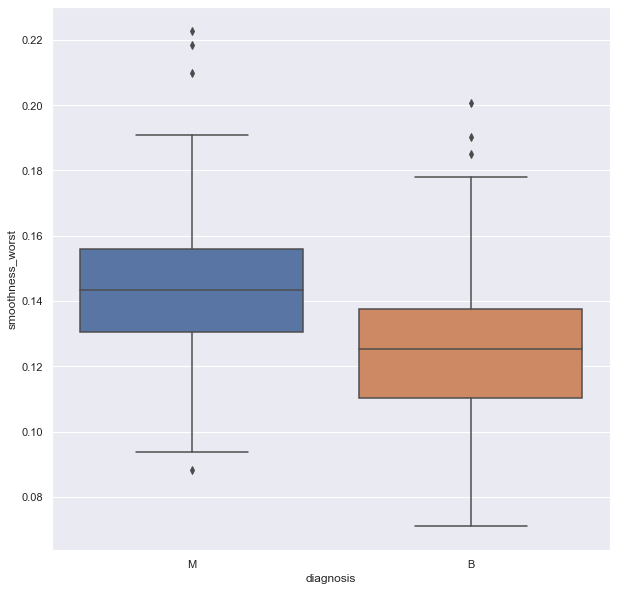

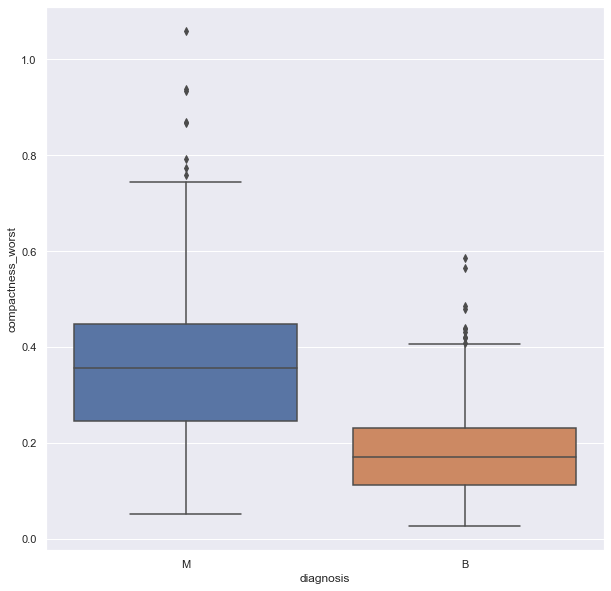

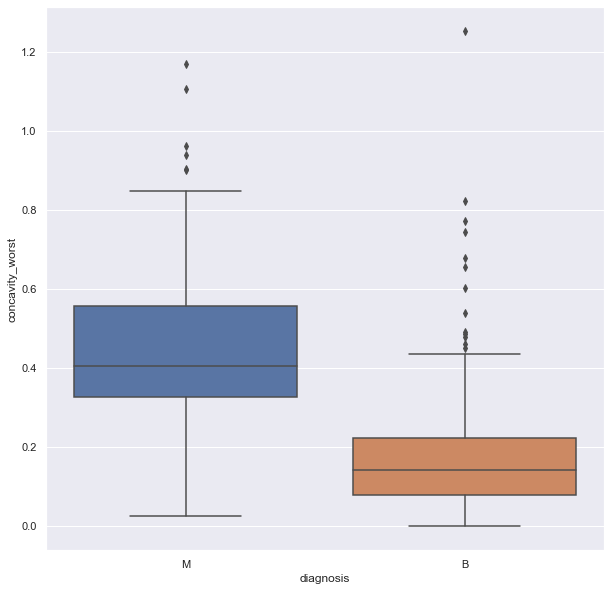

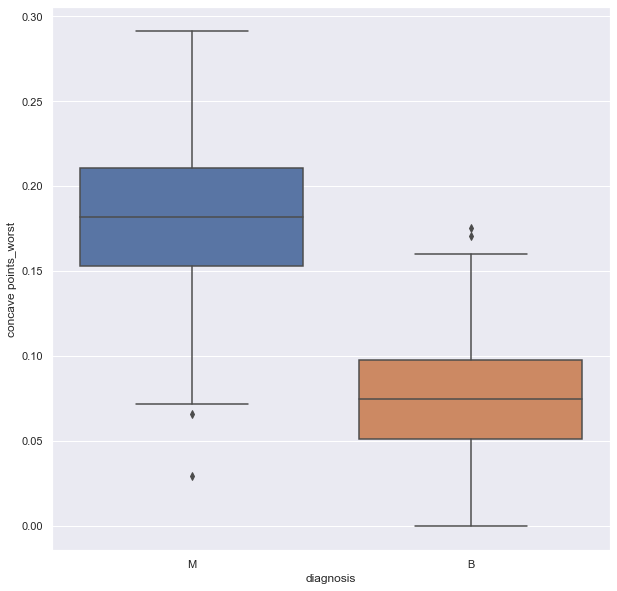

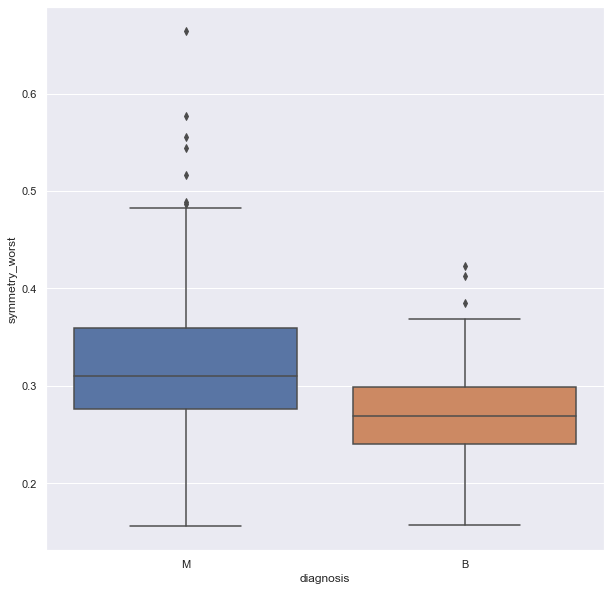

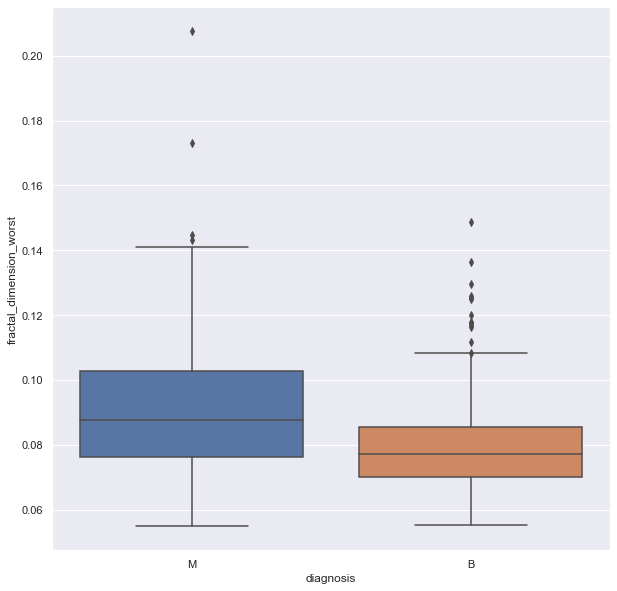

In [42]:
# box plots are also useful in terms of seeing outliers
# If you want, you can visualize other features as well.
for col_name in df.columns[1:]:
    #plot size
    plt.figure(figsize=(10,10))
    sns.boxplot(df['diagnosis'],df[col_name])

    In texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

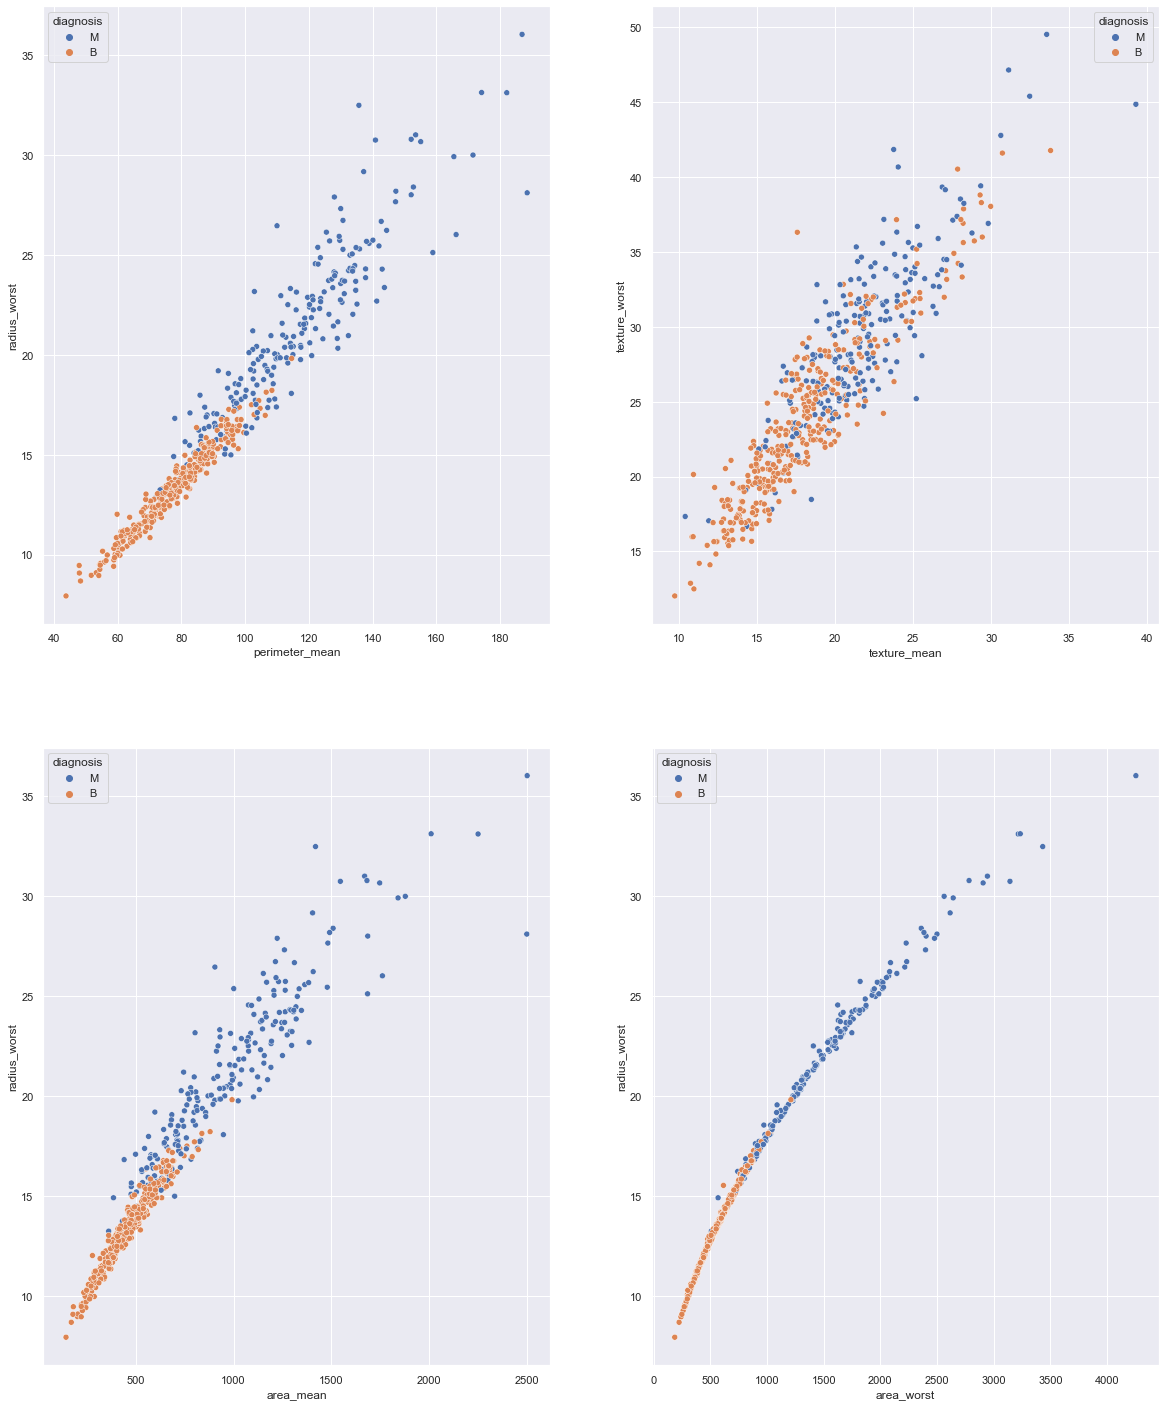

In [43]:
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_se'>

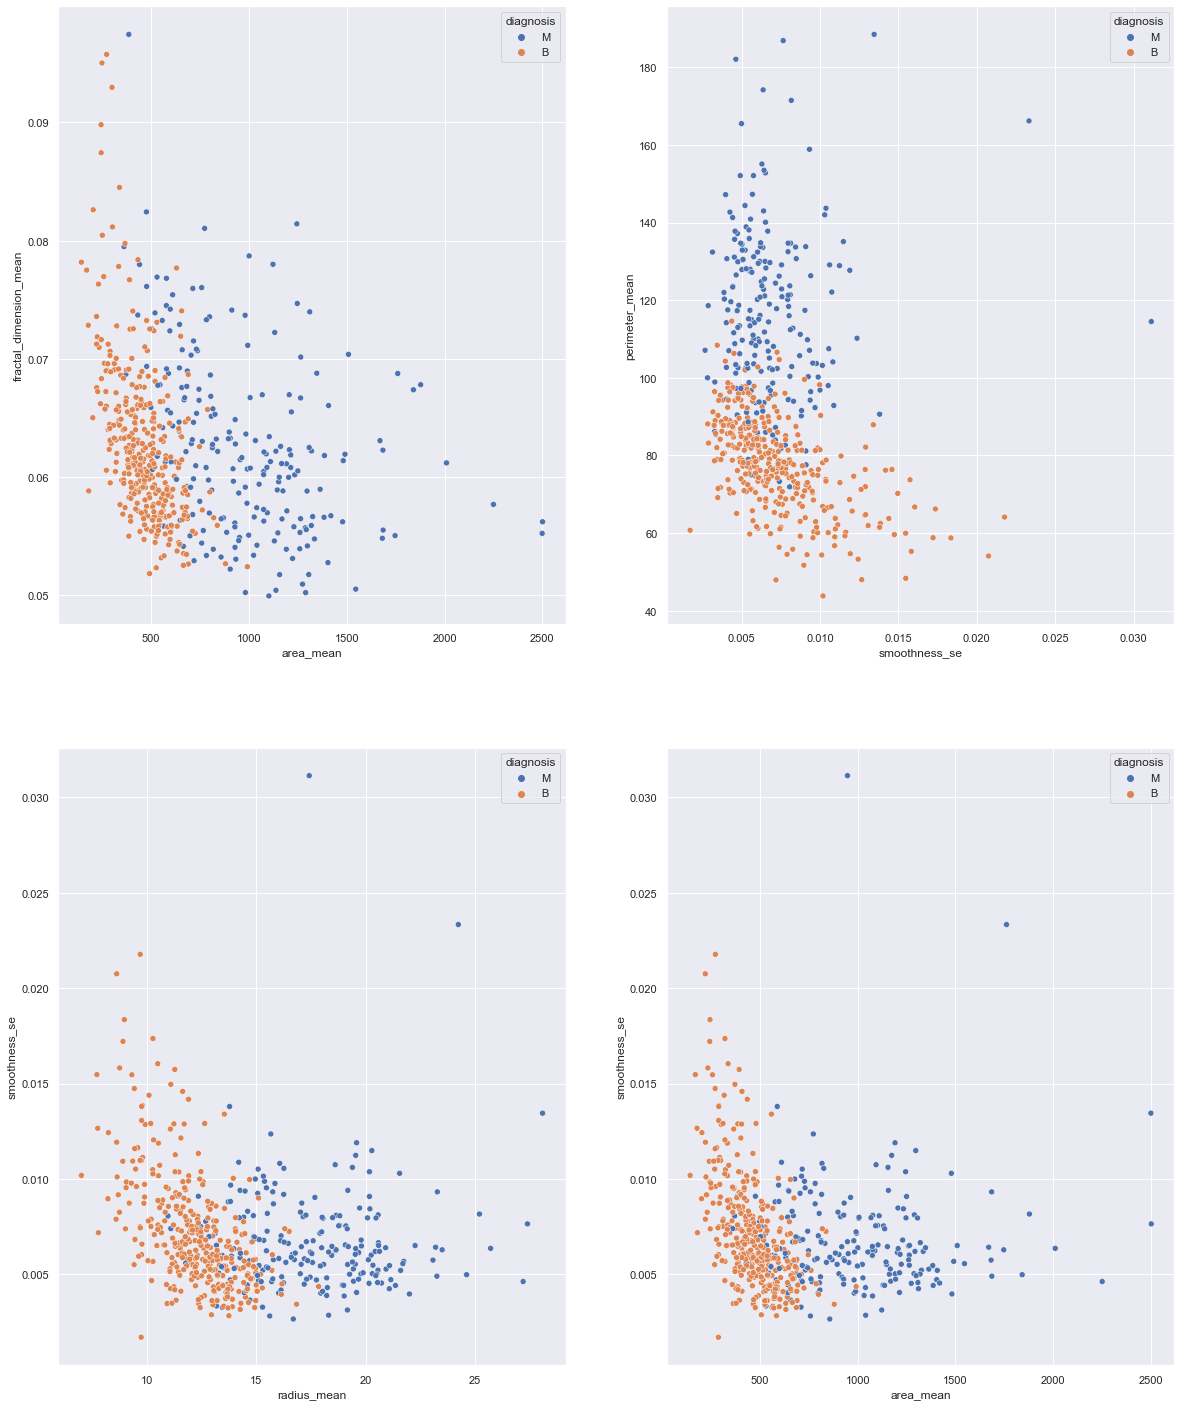

In [44]:
#negative correlation
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])

#### <u>Splitting X and Y</u>

In [8]:
Y = df.diagnosis
df.drop(['diagnosis'], axis = 1, inplace  =True)
X = df

print('Shape of X : ',X.shape)
print('Shape of Y : ',Y.shape)

Shape of X :  (569, 30)
Shape of Y :  (569,)


#### Converting the target variable to numeric using manual encoding

In [9]:
Y.unique()

array(['M', 'B'], dtype=object)

    B => Benign => 0
    M => Malignant => 1

In [10]:
Y = Y.map({'B' : 0, 'M' : 1})
print(Y.unique())

[1 0]


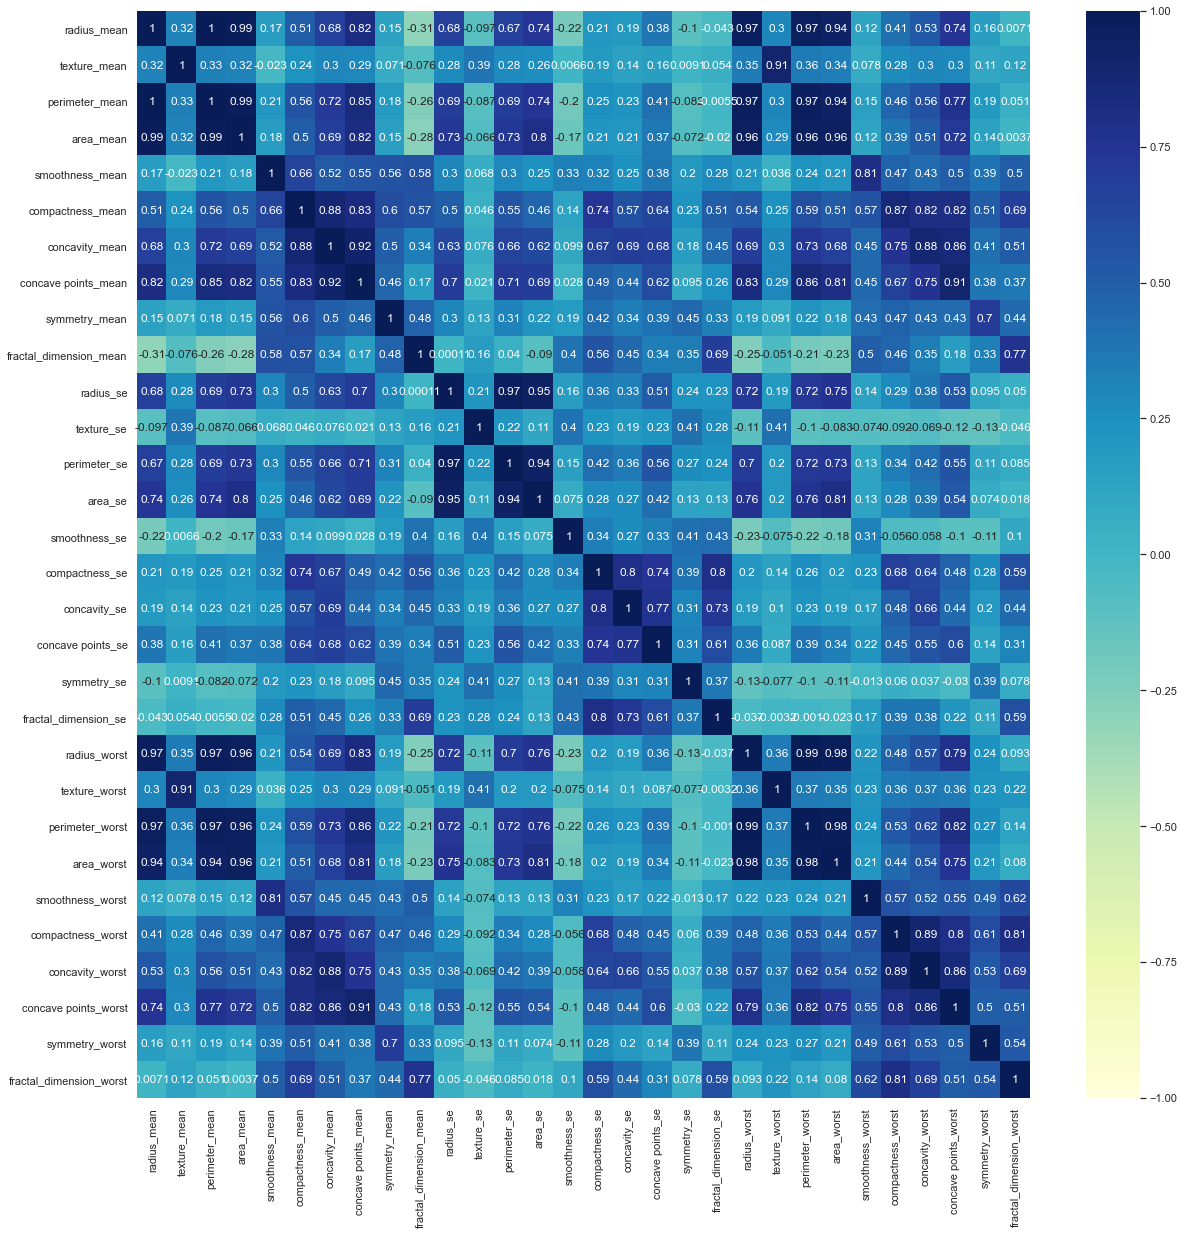

In [11]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, vmin = -1, vmax = 1, cmap = 'YlGnBu' )
plt.show()

Number of Benign:  357
Number of Malignant :  212


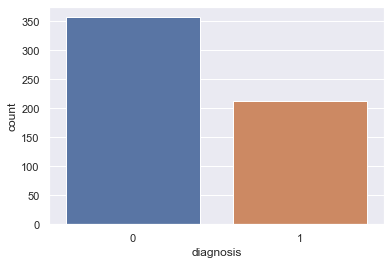

In [12]:
sns.countplot(Y,label="Count")
B, M = Y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

#### Scaling the Independednt variable i.e. X

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

#### Evaluation Matrix (Common block of code for evaluation of the model)m

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc, recall_score, precision_score
def evaluation(Y_test,Y_pred, plot_prediction,plot_ROC, model_name, kfold_mean):
    
    if kfold_mean is None:
        kfold_mean = 'NA'

    cfm=confusion_matrix(Y_test,Y_pred)
    print("Confusion Metrics :\n",cfm)

    print("\n")
    print(pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    print("\nClassification report: \n")

    print(classification_report(Y_test,Y_pred))

    acc=accuracy_score(Y_test, Y_pred) #
    print("\nAccuracy of the model: ",acc)
    
    precision = precision_score(Y_test, Y_pred)
    print("Precision of the model: ",precision)
    
    recall = recall_score(Y_test, Y_pred)
    print("Recall of the model: ",recall)
    
    tn, fp, fn, tp = cfm.ravel()
    
    print('Class 0 True  Negative : ',tn)
    print('Class 0 False Positive : ',fp)
    print('Class 1 False Negative : ',fn)
    print('Class 1 True Positive : ',tp)
    
    print('\n----- YTest v Y pred (30 values)---------')
    print('YTest :',Y_test.values[0:31])
    print('YPred :',Y_pred[0:31])
    fpr, tpr, z = roc_curve(Y_test, Y_pred)
    area_under_curve= auc(fpr,tpr)
    print("\nAUC : ",area_under_curve)
    

    if plot_ROC : 
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr,tpr, 'b', label = area_under_curve)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    
    if plot_prediction :
        plt.figure(figsize=(25,6))
        plt.title('Y_test v Y_pred for first 40 values')
        plt.plot(Y_test.values[0:41], label='Actual', linestyle='--', marker='o', color='g')
        plt.plot(Y_pred[0:41], label='Predicted', linestyle='--', marker='o', color='r')
        plt.legend(prop={'size': 20})
        plt.show()
        
    analysis = [model_name, acc, tn, fp, fn, tp, precision, recall, area_under_curve, kfold_mean ]
        
    return analysis

#### Splitting the data into train & Test data using train_test_split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10, stratify = Y)
print('shape of X_train :: ',X_train.shape)
print('shape of Y_train :: ',Y_train.shape, '\nValue Counts \n', Y_train.value_counts())
print('shape of X_test :: ',X_test.shape)
print('shape of Y_test :: ',Y_test.shape, '\nValue Counts \n', Y_test.value_counts())

shape of X_train ::  (455, 30)
shape of Y_train ::  (455,) 
Value Counts 
 0    285
1    170
Name: diagnosis, dtype: int64
shape of X_test ::  (114, 30)
shape of Y_test ::  (114,) 
Value Counts 
 0    72
1    42
Name: diagnosis, dtype: int64


In [16]:
X_train[91]

array([-1.12676717,  0.06989381, -1.12198124, -0.97606503,  0.28037183,
       -0.555297  , -1.05178411, -0.97395874, -0.07527745,  0.07263664,
       -0.58134288,  1.58418816, -0.6029766 , -0.51785598,  1.95641968,
       -0.18209588, -0.91910327, -0.7646786 ,  0.62690832, -0.57377092,
       -1.16363604, -0.45551043, -1.17300244, -0.93746519, -0.25725505,
       -0.85411327, -1.25761554, -1.40520516, -1.03336661, -0.91579167])

In [17]:
#imports

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [18]:
models = []

#Logistic & its tuning
models.append(['Logistic Regression',LogisticRegression(random_state=100)])
models.append(['RidgeClassifier',RidgeClassifier(random_state=100)])
models.append(['SGDClassifier',SGDClassifier(loss='log', alpha=0.0001, max_iter=1000, shuffle=True, random_state=100, learning_rate='constant', eta0=0.00001, early_stopping=True, n_iter_no_change=5,)])

#KNN
models.append(['KNeigbors',KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])))])

#SVM             
models.append(['SVM',SVC(kernel = 'rbf' ,C = 10, random_state=100)])

#DecisionTree
models.append(['DecisionTree',DecisionTreeClassifier(random_state=100)])

#Bagging
models.append(['RandomForest',RandomForestClassifier(random_state=100)])
models.append(['ExtraTreesClassifier',ExtraTreesClassifier(random_state=100)])
     
#Boosting
models.append(['XGBClassifier',XGBClassifier(random_state=100)])
models.append(['AdaBoostClassifier',AdaBoostClassifier(base_estimator=DecisionTreeClassifier())])
models.append(['CatBoostClassifier', CatBoostClassifier(eval_metric = 'Recall', verbose = 0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier()])

#Naive Bayes
models.append(['GaussianNB',GaussianNB()])

In [19]:
evaluation_df = pd.DataFrame(columns = ['model_name', 'accuracy_score', 'true_negative', 'false_positive', 'false_negative', 'true_positive', 'precision', 'recall', 'area_under_curve', 'kfold_mean'])

In [20]:
evaluation_df

,model_name,accuracy_score,true_negative,false_positive,false_negative,true_positive,precision,recall,area_under_curve,kfold_mean



----------------------Logistic Regression---------------------------
Confusion Metrics :
 [[71  1]
 [ 2 40]]


Predicted   0   1  All
True                  
0          71   1   72
1           2  40   42
All        73  41  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy of the model:  0.9736842105263158
Precision of the model:  0.975609756097561
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  2
Class 1 True Positive :  40

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1

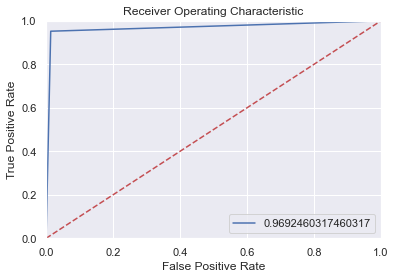


----------------------RidgeClassifier---------------------------
Confusion Metrics :
 [[71  1]
 [ 4 38]]


Predicted   0   1  All
True                  
0          71   1   72
1           4  38   42
All        75  39  114

Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy of the model:  0.956140350877193
Precision of the model:  0.9743589743589743
Recall of the model:  0.9047619047619048
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  4
Class 1 True Positive :  38

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1

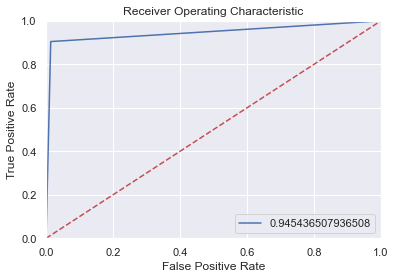


----------------------SGDClassifier---------------------------
Confusion Metrics :
 [[67  5]
 [ 2 40]]


Predicted   0   1  All
True                  
0          67   5   72
1           2  40   42
All        69  45  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Accuracy of the model:  0.9385964912280702
Precision of the model:  0.8888888888888888
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  67
Class 0 False Positive :  5
Class 1 False Negative :  2
Class 1 True Positive :  40

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 

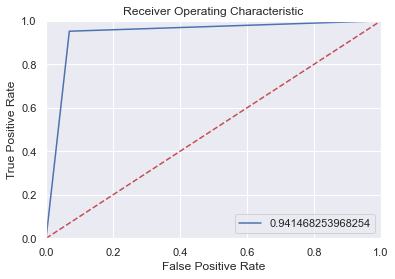


----------------------KNeigbors---------------------------
Confusion Metrics :
 [[72  0]
 [ 4 38]]


Predicted   0   1  All
True                  
0          72   0   72
1           4  38   42
All        76  38  114

Classification report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy of the model:  0.9649122807017544
Precision of the model:  1.0
Recall of the model:  0.9047619047619048
Class 0 True  Negative :  72
Class 0 False Positive :  0
Class 1 False Negative :  4
Class 1 True Positive :  38

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]

AUC :  0.952380

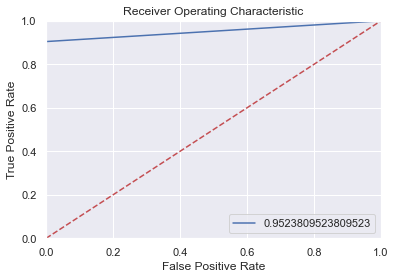


----------------------SVM---------------------------
Confusion Metrics :
 [[71  1]
 [ 0 42]]


Predicted   0   1  All
True                  
0          71   1   72
1           0  42   42
All        71  43  114

Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Accuracy of the model:  0.9912280701754386
Precision of the model:  0.9767441860465116
Recall of the model:  1.0
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  0
Class 1 True Positive :  42

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]

AUC :  0.993055555555

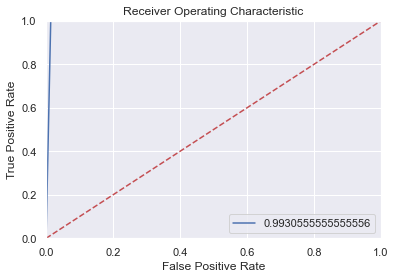


----------------------DecisionTree---------------------------
Confusion Metrics :
 [[68  4]
 [ 1 41]]


Predicted   0   1  All
True                  
0          68   4   72
1           1  41   42
All        69  45  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy of the model:  0.956140350877193
Precision of the model:  0.9111111111111111
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  68
Class 0 False Positive :  4
Class 1 False Negative :  1
Class 1 True Positive :  41

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0]

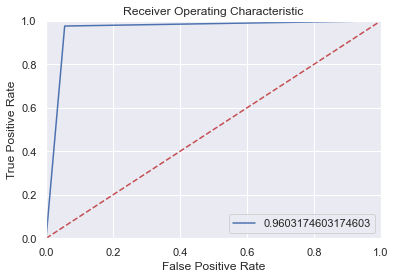


----------------------RandomForest---------------------------
Confusion Metrics :
 [[70  2]
 [ 2 40]]


Predicted   0   1  All
True                  
0          70   2   72
1           2  40   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Accuracy of the model:  0.9649122807017544
Precision of the model:  0.9523809523809523
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  70
Class 0 False Positive :  2
Class 1 False Negative :  2
Class 1 True Positive :  40

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0

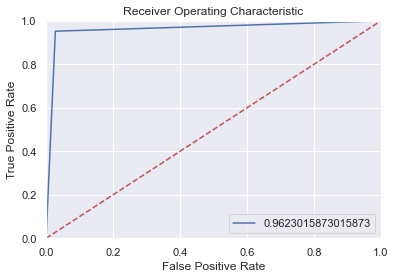


----------------------ExtraTreesClassifier---------------------------
Confusion Metrics :
 [[71  1]
 [ 1 41]]


Predicted   0   1  All
True                  
0          71   1   72
1           1  41   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy of the model:  0.9824561403508771
Precision of the model:  0.9761904761904762
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  1
Class 1 True Positive :  41

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1

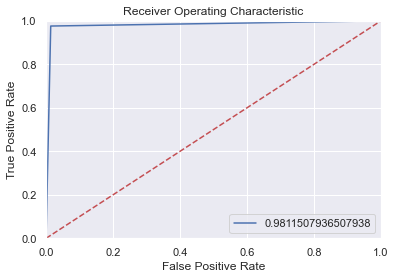


----------------------XGBClassifier---------------------------
[22:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Metrics :
 [[71  1]
 [ 2 40]]


Predicted   0   1  All
True                  
0          71   1   72
1           2  40   42
All        73  41  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy of the model:  0.9736842105263158
Precision of the model:  0.975609756097561
Recall of the model:  0.95238

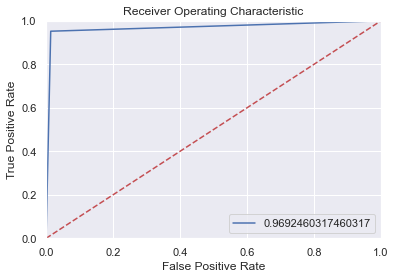


----------------------AdaBoostClassifier---------------------------
Confusion Metrics :
 [[69  3]
 [ 3 39]]


Predicted   0   1  All
True                  
0          69   3   72
1           3  39   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy of the model:  0.9473684210526315
Precision of the model:  0.9285714285714286
Recall of the model:  0.9285714285714286
Class 0 True  Negative :  69
Class 0 False Positive :  3
Class 1 False Negative :  3
Class 1 True Positive :  39

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1

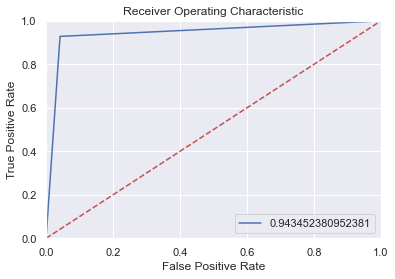


----------------------CatBoostClassifier---------------------------
Confusion Metrics :
 [[71  1]
 [ 2 40]]


Predicted   0   1  All
True                  
0          71   1   72
1           2  40   42
All        73  41  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy of the model:  0.9736842105263158
Precision of the model:  0.975609756097561
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  2
Class 1 True Positive :  40

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 

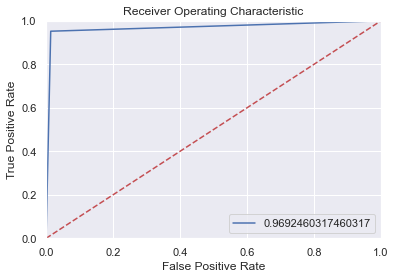


----------------------GradientBoostingClassifier---------------------------
Confusion Metrics :
 [[69  3]
 [ 2 40]]


Predicted   0   1  All
True                  
0          69   3   72
1           2  40   42
All        71  43  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy of the model:  0.956140350877193
Precision of the model:  0.9302325581395349
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  69
Class 0 False Positive :  3
Class 1 False Negative :  2
Class 1 True Positive :  40

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 

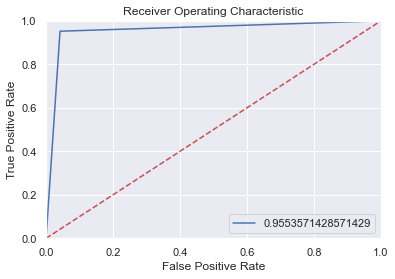


----------------------GaussianNB---------------------------
Confusion Metrics :
 [[67  5]
 [ 1 41]]


Predicted   0   1  All
True                  
0          67   5   72
1           1  41   42
All        68  46  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy of the model:  0.9473684210526315
Precision of the model:  0.8913043478260869
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  67
Class 0 False Positive :  5
Class 1 False Negative :  1
Class 1 True Positive :  41

----- YTest v Y pred (30 values)---------
YTest : [1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0]
YPred : [1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0]


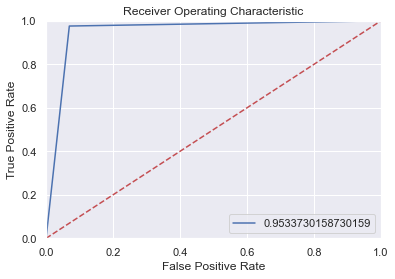

In [21]:
for m in range(len(models)):
    print(f'\n----------------------{models[m][0]}---------------------------')
    model = models[m][1]
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)   
    evaluation_df = evaluation_df.append(pd.Series(evaluation(Y_test,Y_pred, False,True, models[m][0], None), index = evaluation_df.columns), ignore_index=True)

In [22]:
evaluation_df

,model_name,accuracy_score,true_negative,false_positive,false_negative,true_positive,precision,recall,area_under_curve,kfold_mean
0,Logistic Regression,0.973684,71,1,2,40,0.975610,0.952381,0.969246,NA
1,RidgeClassifier,0.956140,71,1,4,38,0.974359,0.904762,0.945437,NA
2,SGDClassifier,0.938596,67,5,2,40,0.888889,0.952381,0.941468,NA
3,KNeigbors,0.964912,72,0,4,38,1.000000,0.904762,0.952381,NA
4,SVM,0.991228,71,1,0,42,0.976744,1.000000,0.993056,NA
5,DecisionTree,0.956140,68,4,1,41,0.911111,0.976190,0.960317,NA
6,RandomForest,0.964912,70,2,2,40,0.952381,0.952381,0.962302,NA
7,ExtraTreesClassifier,0.982456,71,1,1,41,0.976190,0.976190,0.981151,NA
8,XGBClassifier,0.973684,71,1,2,40,0.975610,0.952381,0.969246,NA
9,AdaBoostClassifier,0.947368,69,3,3,39,0.928571,0.928571,0.943452,NA


#### Cross Validation - K-Fold

In [23]:
models = []

#Logistic & its tuning
models.append(['Logistic Regression',LogisticRegression(random_state=100)])
models.append(['RidgeClassifier',RidgeClassifier(random_state=100)])
models.append(['SGDClassifier',SGDClassifier(loss='log', alpha=0.0001, max_iter=1000, shuffle=True, random_state=100, learning_rate='constant', eta0=0.00001, early_stopping=True, n_iter_no_change=5,)])

#KNN
models.append(['KNeigbors',KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])))])

#SVM             
models.append(['SVM',SVC(kernel = 'rbf' ,C = 100, random_state=100)])

#DecisionTree
models.append(['DecisionTree',DecisionTreeClassifier(random_state=100)])

#Bagging
models.append(['RandomForest',RandomForestClassifier(random_state=100)])
models.append(['ExtraTreesClassifier',ExtraTreesClassifier(random_state=100)])
     
#Boosting
models.append(['XGBClassifier',XGBClassifier(random_state=100)])
models.append(['AdaBoostClassifier',AdaBoostClassifier(base_estimator=DecisionTreeClassifier())])
models.append(['CatBoostClassifier', CatBoostClassifier(eval_metric = 'AUC', verbose = 0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier()])

#Naive Bayes
models.append(['GaussianNB',GaussianNB()])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc, recall_score, precision_score
def evaluation_kfold(Y_test,Y_pred, plot_prediction,plot_ROC, model_name, kfold_mean):
    
    if kfold_mean is None:
        kfold_mean = 'NA'

    cfm=confusion_matrix(Y_test,Y_pred)
    print("Confusion Metrics :\n",cfm)

    print("\n")
    print(pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    print("\nClassification report: \n")

    print(classification_report(Y_test,Y_pred))

    acc=accuracy_score(Y_test, Y_pred) #
    print("\nAccuracy of the model: ",acc)
    
    precision = precision_score(Y_test, Y_pred)
    print("Precision of the model: ",precision)
    
    recall = recall_score(Y_test, Y_pred)
    print("Recall of the model: ",recall)
    
    tn, fp, fn, tp = cfm.ravel()
    
    print('Class 0 True  Negative : ',tn)
    print('Class 0 False Positive : ',fp)
    print('Class 1 False Negative : ',fn)
    print('Class 1 True Positive : ',tp)
    
    fpr, tpr, z = roc_curve(Y_test, Y_pred)
    area_under_curve= auc(fpr,tpr)
    print("\nAUC : ",area_under_curve)
    

    if plot_ROC : 
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr,tpr, 'b', label = area_under_curve)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    
    if plot_prediction :
        plt.figure(figsize=(25,6))
        plt.title('Y_test v Y_pred for first 40 values')
        plt.plot(Y_test.values[0:41], label='Actual', linestyle='--', marker='o', color='g')
        plt.plot(Y_pred[0:41], label='Predicted', linestyle='--', marker='o', color='r')
        plt.legend(prop={'size': 20})
        plt.show()
        
    analysis = [model_name, acc, tn, fp, fn, tp, precision, recall, area_under_curve, kfold_mean ]
        
    return analysis

In [25]:
Y_cv = Y.values
X_cv = X

In [26]:
type(X_cv)

numpy.ndarray

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_cv, Y_cv, test_size=0.2,random_state=10, stratify = Y)
print('shape of X_train :: ',X_train.shape)
print('shape of X_test :: ',X_test.shape)

shape of X_train ::  (455, 30)
shape of X_test ::  (114, 30)



----------------------Logistic Regression---------------------------
0.9714285714285715
Confusion Metrics :
 [[71  1]
 [ 2 40]]


Predicted   0   1  All
True                  
0          71   1   72
1           2  40   42
All        73  41  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy of the model:  0.9736842105263158
Precision of the model:  0.975609756097561
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  2
Class 1 True Positive :  40

AUC :  0.9692460317460317


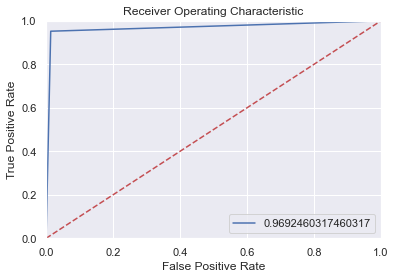


----------------------RidgeClassifier---------------------------
0.9582417582417582
Confusion Metrics :
 [[71  1]
 [ 3 39]]


Predicted   0   1  All
True                  
0          71   1   72
1           3  39   42
All        74  40  114

Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy of the model:  0.9649122807017544
Precision of the model:  0.975
Recall of the model:  0.9285714285714286
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  3
Class 1 True Positive :  39

AUC :  0.9573412698412699


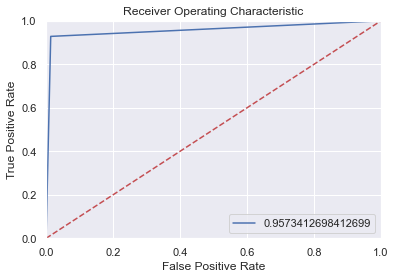


----------------------SGDClassifier---------------------------
0.9318681318681319
Confusion Metrics :
 [[67  5]
 [ 2 40]]


Predicted   0   1  All
True                  
0          67   5   72
1           2  40   42
All        69  45  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Accuracy of the model:  0.9385964912280702
Precision of the model:  0.8888888888888888
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  67
Class 0 False Positive :  5
Class 1 False Negative :  2
Class 1 True Positive :  40

AUC :  0.941468253968254


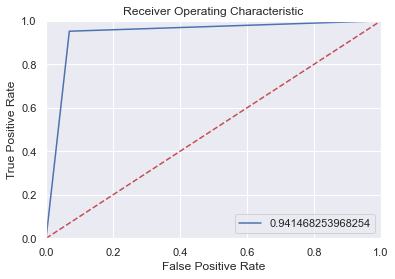


----------------------KNeigbors---------------------------
0.956043956043956
Confusion Metrics :
 [[72  0]
 [ 3 39]]


Predicted   0   1  All
True                  
0          72   0   72
1           3  39   42
All        75  39  114

Classification report: 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy of the model:  0.9736842105263158
Precision of the model:  1.0
Recall of the model:  0.9285714285714286
Class 0 True  Negative :  72
Class 0 False Positive :  0
Class 1 False Negative :  3
Class 1 True Positive :  39

AUC :  0.9642857142857143


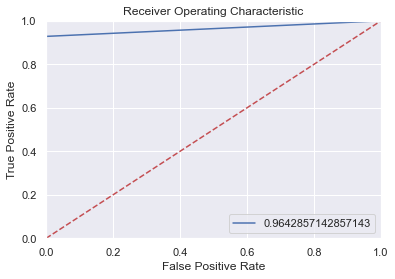


----------------------SVM---------------------------
0.956043956043956
Confusion Metrics :
 [[71  1]
 [ 1 41]]


Predicted   0   1  All
True                  
0          71   1   72
1           1  41   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy of the model:  0.9824561403508771
Precision of the model:  0.9761904761904762
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  1
Class 1 True Positive :  41

AUC :  0.9811507936507938


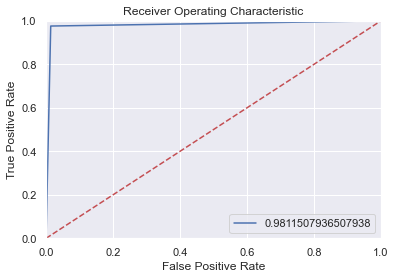


----------------------DecisionTree---------------------------
0.945054945054945
Confusion Metrics :
 [[64  8]
 [ 1 41]]


Predicted   0   1  All
True                  
0          64   8   72
1           1  41   42
All        65  49  114

Classification report: 

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        72
           1       0.84      0.98      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114


Accuracy of the model:  0.9210526315789473
Precision of the model:  0.8367346938775511
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  64
Class 0 False Positive :  8
Class 1 False Negative :  1
Class 1 True Positive :  41

AUC :  0.9325396825396824


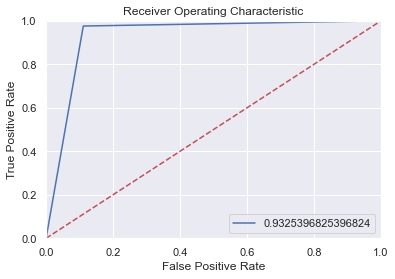


----------------------RandomForest---------------------------
0.9692307692307691
Confusion Metrics :
 [[71  1]
 [ 1 41]]


Predicted   0   1  All
True                  
0          71   1   72
1           1  41   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy of the model:  0.9824561403508771
Precision of the model:  0.9761904761904762
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  1
Class 1 True Positive :  41

AUC :  0.9811507936507938


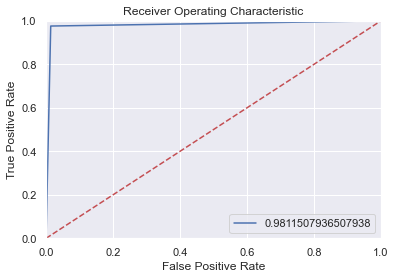


----------------------ExtraTreesClassifier---------------------------
0.9670329670329672
Confusion Metrics :
 [[69  3]
 [ 3 39]]


Predicted   0   1  All
True                  
0          69   3   72
1           3  39   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy of the model:  0.9473684210526315
Precision of the model:  0.9285714285714286
Recall of the model:  0.9285714285714286
Class 0 True  Negative :  69
Class 0 False Positive :  3
Class 1 False Negative :  3
Class 1 True Positive :  39

AUC :  0.943452380952381


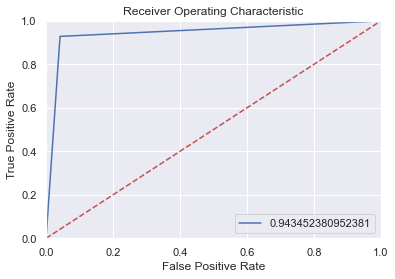


----------------------XGBClassifier---------------------------
[22:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04

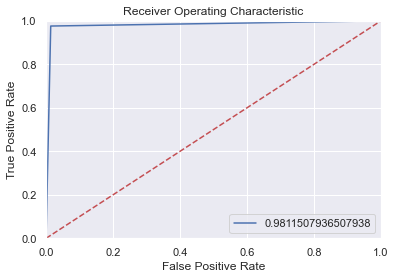


----------------------AdaBoostClassifier---------------------------
0.9406593406593406
Confusion Metrics :
 [[62 10]
 [ 3 39]]


Predicted   0   1  All
True                  
0          62  10   72
1           3  39   42
All        65  49  114

Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        72
           1       0.80      0.93      0.86        42

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.90      0.89      0.89       114


Accuracy of the model:  0.8859649122807017
Precision of the model:  0.7959183673469388
Recall of the model:  0.9285714285714286
Class 0 True  Negative :  62
Class 0 False Positive :  10
Class 1 False Negative :  3
Class 1 True Positive :  39

AUC :  0.8948412698412699


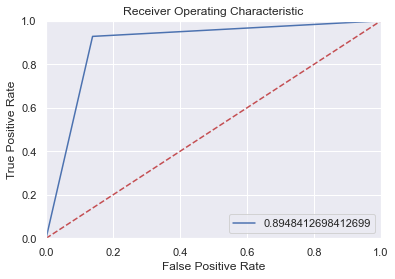


----------------------CatBoostClassifier---------------------------
0.9670329670329669
Confusion Metrics :
 [[71  1]
 [ 2 40]]


Predicted   0   1  All
True                  
0          71   1   72
1           2  40   42
All        73  41  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy of the model:  0.9736842105263158
Precision of the model:  0.975609756097561
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  2
Class 1 True Positive :  40

AUC :  0.9692460317460317


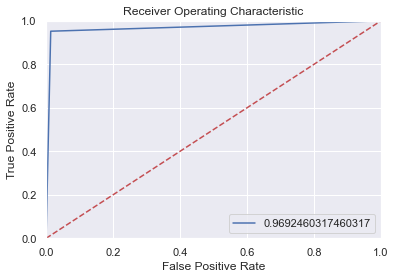


----------------------GradientBoostingClassifier---------------------------
0.956043956043956
Confusion Metrics :
 [[69  3]
 [ 2 40]]


Predicted   0   1  All
True                  
0          69   3   72
1           2  40   42
All        71  43  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy of the model:  0.956140350877193
Precision of the model:  0.9302325581395349
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  69
Class 0 False Positive :  3
Class 1 False Negative :  2
Class 1 True Positive :  40

AUC :  0.9553571428571429


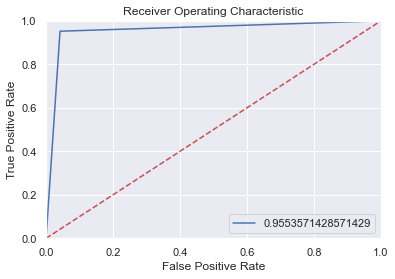


----------------------GaussianNB---------------------------
0.9318681318681319
Confusion Metrics :
 [[67  5]
 [ 2 40]]


Predicted   0   1  All
True                  
0          67   5   72
1           2  40   42
All        69  45  114

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Accuracy of the model:  0.9385964912280702
Precision of the model:  0.8888888888888888
Recall of the model:  0.9523809523809523
Class 0 True  Negative :  67
Class 0 False Positive :  5
Class 1 False Negative :  2
Class 1 True Positive :  40

AUC :  0.941468253968254


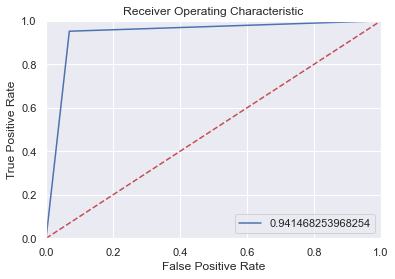

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for m in range(len(models)):
    print(f'\n----------------------{models[m][0]}---------------------------')
    model = models[m][1]
    kfold_cv=KFold(n_splits=5)
    kfold_cv_result=cross_val_score(estimator=model, X=X_train, y=Y_train, cv=kfold_cv)
    kfold_mean = kfold_cv_result.mean()
    print(kfold_mean)
    
    for train_value, test_value in kfold_cv.split(X_train):
        #print(X_train.iloc[train_value,:])
        model.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
    Y_pred = model.predict(X_test)   
    evaluation_df = evaluation_df.append(pd.Series(evaluation_kfold(Y_test,Y_pred, False,True, models[m][0], kfold_mean), index = evaluation_df.columns), ignore_index=True)

In [29]:
evaluation_df

,model_name,accuracy_score,true_negative,false_positive,false_negative,true_positive,precision,recall,area_under_curve,kfold_mean
0,Logistic Regression,0.973684,71,1,2,40,0.975610,0.952381,0.969246,NA
1,RidgeClassifier,0.956140,71,1,4,38,0.974359,0.904762,0.945437,NA
2,SGDClassifier,0.938596,67,5,2,40,0.888889,0.952381,0.941468,NA
3,KNeigbors,0.964912,72,0,4,38,1.000000,0.904762,0.952381,NA
4,SVM,0.991228,71,1,0,42,0.976744,1.000000,0.993056,NA
5,DecisionTree,0.956140,68,4,1,41,0.911111,0.976190,0.960317,NA
6,RandomForest,0.964912,70,2,2,40,0.952381,0.952381,0.962302,NA
7,ExtraTreesClassifier,0.982456,71,1,1,41,0.976190,0.976190,0.981151,NA
8,XGBClassifier,0.973684,71,1,2,40,0.975610,0.952381,0.969246,NA
9,AdaBoostClassifier,0.947368,69,3,3,39,0.928571,0.928571,0.943452,NA


We see that Random Forest, SVM, XGB  are the top preference and are only missclassifying 2 obs

As per the scope let us tune the SVM model finding out the best parameter using GridSearchCV

In [30]:
svc_model = SVC(random_state=100)
parameter_space = { 'kernel': ['rbf', 'sigmoid', 'linear'], 'C' : [1,2,3,4,5,6,7,8,9,10] , 'gamma' :  [ 'scale', 'auto', 0.1, 0.01, 0.001] } 
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5) 
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=100), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'linear']})

In [31]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [32]:
decision_tree = DecisionTreeClassifier(random_state=10)
parameter_space = {'criterion': ['gini', 'entropy'], 'max_depth' : range(3,15) } 
clf = GridSearchCV(decision_tree, parameter_space, n_jobs=-1, cv=5) 
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 15)})

In [33]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'criterion': 'gini', 'max_depth': 4}


In [34]:
models = []

#SVM             
models.append(['SVM-Tuned',SVC(gamma = 'scale' ,kernel = 'linear' ,C = 3)])
models.append(['AdaBoostClassifier-Gaussian',AdaBoostClassifier(base_estimator=GaussianNB())])
models.append(['AdaBoostClassifier-DecisionTree',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion= 'gini', max_depth= 4))])


----------------------SVM-Tuned---------------------------
Confusion Metrics :
 [[71  1]
 [ 1 41]]


Predicted   0   1  All
True                  
0          71   1   72
1           1  41   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy of the model:  0.9824561403508771
Precision of the model:  0.9761904761904762
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  1
Class 1 True Positive :  41

AUC :  0.9811507936507938


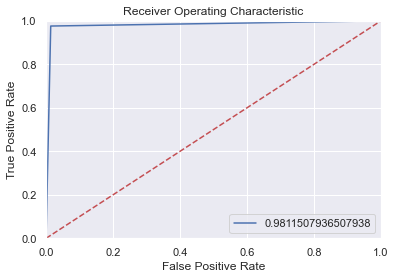


----------------------AdaBoostClassifier-Gaussian---------------------------
Confusion Metrics :
 [[70  2]
 [ 4 38]]


Predicted   0   1  All
True                  
0          70   2   72
1           4  38   42
All        74  40  114

Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Accuracy of the model:  0.9473684210526315
Precision of the model:  0.95
Recall of the model:  0.9047619047619048
Class 0 True  Negative :  70
Class 0 False Positive :  2
Class 1 False Negative :  4
Class 1 True Positive :  38

AUC :  0.9384920634920634


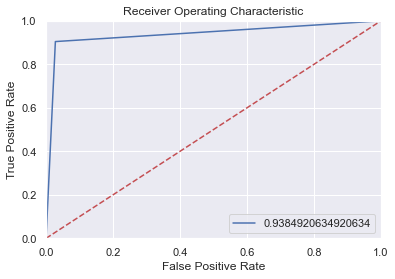


----------------------AdaBoostClassifier-DecisionTree---------------------------
Confusion Metrics :
 [[71  1]
 [ 1 41]]


Predicted   0   1  All
True                  
0          71   1   72
1           1  41   42
All        72  42  114

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy of the model:  0.9824561403508771
Precision of the model:  0.9761904761904762
Recall of the model:  0.9761904761904762
Class 0 True  Negative :  71
Class 0 False Positive :  1
Class 1 False Negative :  1
Class 1 True Positive :  41

AUC :  0.9811507936507938


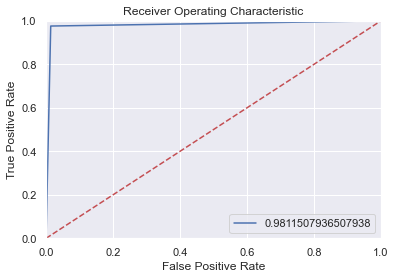

In [35]:
for m in range(len(models)):
    print(f'\n----------------------{models[m][0]}---------------------------')
    model = models[m][1]
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)   
    evaluation_df = evaluation_df.append(pd.Series(evaluation_kfold(Y_test,Y_pred, False,True, models[m][0], None), index = evaluation_df.columns), ignore_index=True)

In [36]:
evaluation_df

,model_name,accuracy_score,true_negative,false_positive,false_negative,true_positive,precision,recall,area_under_curve,kfold_mean
0,Logistic Regression,0.973684,71,1,2,40,0.975610,0.952381,0.969246,NA
1,RidgeClassifier,0.956140,71,1,4,38,0.974359,0.904762,0.945437,NA
2,SGDClassifier,0.938596,67,5,2,40,0.888889,0.952381,0.941468,NA
3,KNeigbors,0.964912,72,0,4,38,1.000000,0.904762,0.952381,NA
4,SVM,0.991228,71,1,0,42,0.976744,1.000000,0.993056,NA
5,DecisionTree,0.956140,68,4,1,41,0.911111,0.976190,0.960317,NA
6,RandomForest,0.964912,70,2,2,40,0.952381,0.952381,0.962302,NA
7,ExtraTreesClassifier,0.982456,71,1,1,41,0.976190,0.976190,0.981151,NA
8,XGBClassifier,0.973684,71,1,2,40,0.975610,0.952381,0.969246,NA
9,AdaBoostClassifier,0.947368,69,3,3,39,0.928571,0.928571,0.943452,NA


    There is no change in SVM.
    Decision tree has been boosted perfectly

#### <u>Conclusion</u>

    We have implemented all the supervised Classifier. Random Forest and SVM are doing the best job in prediction with cross validation. Also Decision tree was boosted successfully with Adaboost

    We can further tune the model by using feature selection technique such as PCA or Random Forest Feature impotance and re-run the model with the most significant feature. We could also use Keras for model building and prediction